## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_num = merged_df['Mouse ID'].unique()
mice_num = pd.Series(mice_num)
mice_num = mice_num.count()
mice_num

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
no_dups = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
no_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
returned_no_dups = merged_df[merged_df.duplicated(['Timepoint','Mouse ID'],keep=False)]
returned_no_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
no_dups_num = no_dups['Mouse ID'].unique()
no_dups_num = pd.Series(no_dups_num)
no_dups_num = no_dups_num.count()
no_dups_num

249

In [10]:
no_dups.loc[no_dups['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = no_dups.copy()
regimen_group = regimen_group.drop(columns=["Mouse ID","Age_months","Weight (g)","Timepoint","Metastatic Sites","Sex"])
regimen_group_mean = regimen_group.groupby('Drug Regimen').mean()
regimen_group_median = regimen_group.groupby('Drug Regimen').median()
regimen_group_var = regimen_group.groupby('Drug Regimen').var()
regimen_group_std = regimen_group.groupby('Drug Regimen').std()
regimen_group_sem = regimen_group.groupby('Drug Regimen').sem()
regimen_group_merged = pd.merge(regimen_group_mean,regimen_group_median,on="Drug Regimen")
regimen_group_merged = regimen_group_merged.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})
regimen_group_merged["Variance"] = regimen_group_var["Tumor Volume (mm3)"]
regimen_group_merged["Standard Deviation"] = regimen_group_std["Tumor Volume (mm3)"]
regimen_group_merged["SEM"] = regimen_group_sem["Tumor Volume (mm3)"]
regimen_group_merged.reset_index()

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_group_merged.agg(['Mean','Median','Variance','Standard Deviation','SEM'],axis='columns').reset_index()

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_count = no_dups['Drug Regimen'].value_counts()
drugs = no_dups['Drug Regimen'].unique()
#drugs
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     151
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Timepoints')

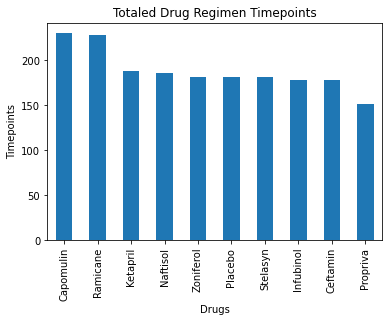

In [14]:
regimen_count.plot(kind='bar')
plt.title('Totaled Drug Regimen Timepoints')
plt.xlabel('Drugs') 
plt.ylabel('Timepoints')

<BarContainer object of 10 artists>

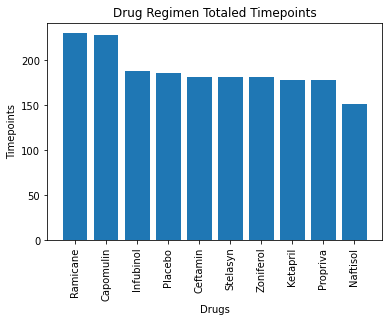

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
timepoints = [230,228,188,186,182,181,181,178,178,151]

x_axis = np.arange(0,len(drugs))
ticks = []
for x in x_axis:
    ticks.append(x)

plt.title('Drug Regimen Totaled Timepoints')
plt.xlabel('Drugs') 
plt.ylabel('Timepoints')

plt.xticks(rotation = 90)

plt.xticks(ticks,drugs)
plt.bar(x_axis,timepoints)

([<matplotlib.patches.Wedge at 0x7fa95d40fa60>,
 [Text(-0.030277540496140426, 1.099583225836728, 'Male'),
  Text(0.030277540496140783, -1.099583225836728, 'Female')],
 [Text(-0.016515022088803868, 0.5997726686382152, '50.9%'),
  Text(0.016515022088804062, -0.5997726686382152, '49.1%')])

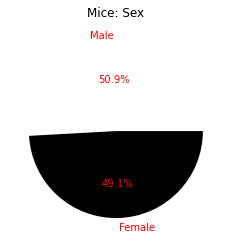

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = ['Male','Female']
sex_count = [958,925]
colors = ['white','black']
plt.title("Mice: Sex")
plt.pie(sex_count,labels=sex,colors=colors,textprops={'color':"r"},autopct="%1.1f%%")

<AxesSubplot:ylabel='Sex'>

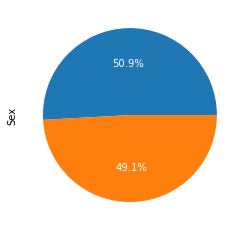

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = no_dups["Sex"].value_counts()
gender.plot(kind='pie',textprops={'color':"w"},autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Create a copy of the cleaned data to alter
clean_df = no_dups.copy()
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
tum_vol = []

#Create data series with only the desired drugs to summarize
capo = no_dups.loc[no_dups['Drug Regimen']=='Capomulin']
rami = no_dups.loc[no_dups['Drug Regimen']=='Ramicane']
infu = no_dups.loc[no_dups['Drug Regimen']=='Infubinol']
ceft = no_dups.loc[no_dups['Drug Regimen']=='Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_capo = capo.groupby('Mouse ID').max()['Timepoint']
last_rami = rami.groupby('Mouse ID').max()['Timepoint']
last_infu = infu.groupby('Mouse ID').max()['Timepoint']
last_ceft = ceft.groupby('Mouse ID').max()['Timepoint']

#Resets the index to set the headers on the same row
capo = pd.DataFrame(last_capo).reset_index()
rami = pd.DataFrame(last_rami).reset_index()
infu = pd.DataFrame(last_infu).reset_index()
ceft = pd.DataFrame(last_ceft).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_capo = pd.merge(capo,clean_df,on=("Mouse ID","Timepoint"),how="left")
merged_rami = pd.merge(rami,clean_df,on=("Mouse ID","Timepoint"),how="left")
merged_infu = pd.merge(infu,clean_df,on=("Mouse ID","Timepoint"),how="left")
merged_ceft = pd.merge(ceft,clean_df,on=("Mouse ID","Timepoint"),how="left")

#Add the Tumor Volume data to empty lists
capo_vol = merged_capo['Tumor Volume (mm3)']
rami_vol = merged_rami['Tumor Volume (mm3)']
infu_vol = merged_infu['Tumor Volume (mm3)']
ceft_vol = merged_ceft['Tumor Volume (mm3)']

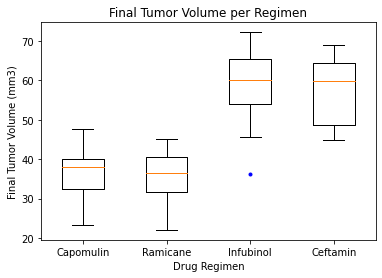

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [capo_vol,rami_vol,infu_vol,ceft_vol]
#four_drugs

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(plot_data,sym='b.', labels=four_drugs, widths = 0.5, vert=True)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Timepoint')

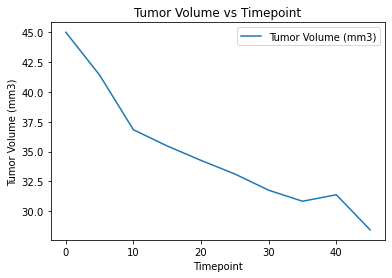

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fav_mouse = no_dups.loc[no_dups['Mouse ID']=='m601']
fav_mouse_line = fav_mouse.drop(columns=['Sex','Age_months','Drug Regimen','Metastatic Sites','Mouse ID','Weight (g)'])
fav_mouse_line.plot(y='Tumor Volume (mm3)',x='Timepoint',kind="line")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint')

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

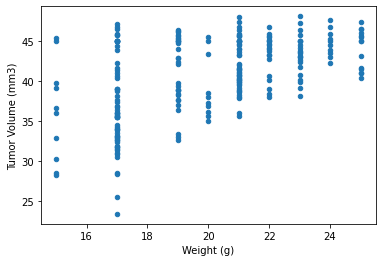

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_vol_weight = no_dups.loc[no_dups['Drug Regimen']=='Capomulin']
capo_vol_weight.groupby('Mouse ID').mean()
capo_vol_weight = capo_vol_weight.drop(columns=['Drug Regimen','Sex','Timepoint','Age_months','Metastatic Sites','Mouse ID'])
capo_vol_weight.plot(x='Weight (g)',y='Tumor Volume (mm3)',kind='scatter')

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_vol_weight

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876
...,...,...
440,24,47.685963
1452,25,45.000000
1453,25,45.597064
1454,25,46.059608


Results 
------------------------------------------- 
The slope is: 0.96
The intercept is: 21.49
The line equation is: y = 0.96x + 21.49
The rvalue is: 0.53
The pvalue is: 9.605446629502282e-18
The standard deviation is 0.1


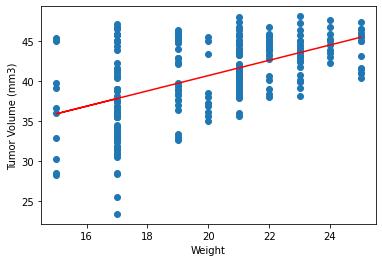

In [64]:
weight = capo_vol_weight.iloc[:,0]
volume = capo_vol_weight.iloc[:,1]
plt.scatter(weight,volume)
plt.plot(x_values,regress_values,"r")
# plt.xticks(weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
# plt.show()
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("Results \n"
      "------------------------------------------- \n"
      f"The slope is: {round(slope,2)}\n"
      f"The intercept is: {round(intercept,2)}\n"
      f"The line equation is: {line_eq}\n"
      f"The rvalue is: {round(rvalue,2)}\n"
      f"The pvalue is: {(pvalue)}\n"
      f"The standard deviation is {round(stderr,2)}")
plt.show()